In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
data = pd.read_csv('./Raw_Data.csv', sep=',')
data.shape


(492, 3)

Applying filter, due to trolls

In [2]:
data['Difference']=data['Actual Grade']-data['Predicted Grade']
data = data[(data['Actual Grade']>12)&(data['Actual Grade']<=45)&(data['Predicted Grade']>12)&(data['Predicted Grade']<=45)&(data['Difference']<=20)]
pd.options.display.float_format = '{:,.3f}'.format

In [3]:
data.describe()

,Actual Grade,Predicted Grade,Difference
count,451.000,451.000,451.000
mean,35.882,37.224,-1.341
std,6.033,5.447,4.871
min,18.000,19.000,-24.000
25%,32.000,34.000,-3.000
50%,37.000,38.000,-1.000
75%,40.000,42.000,1.000
max,45.000,45.000,19.000


In [4]:
data['Actual Grade'].mode()

0    39
dtype: int64

In [5]:
data['Predicted Grade'].mode()

0   38.000
dtype: float64

In [6]:
data['Difference'].mode()

0   -1.000
dtype: float64

In [7]:
data.corr()

,Actual Grade,Predicted Grade,Difference
Actual Grade,1.000,0.644,0.518
Predicted Grade,0.644,1.000,-0.320
Difference,0.518,-0.320,1.000


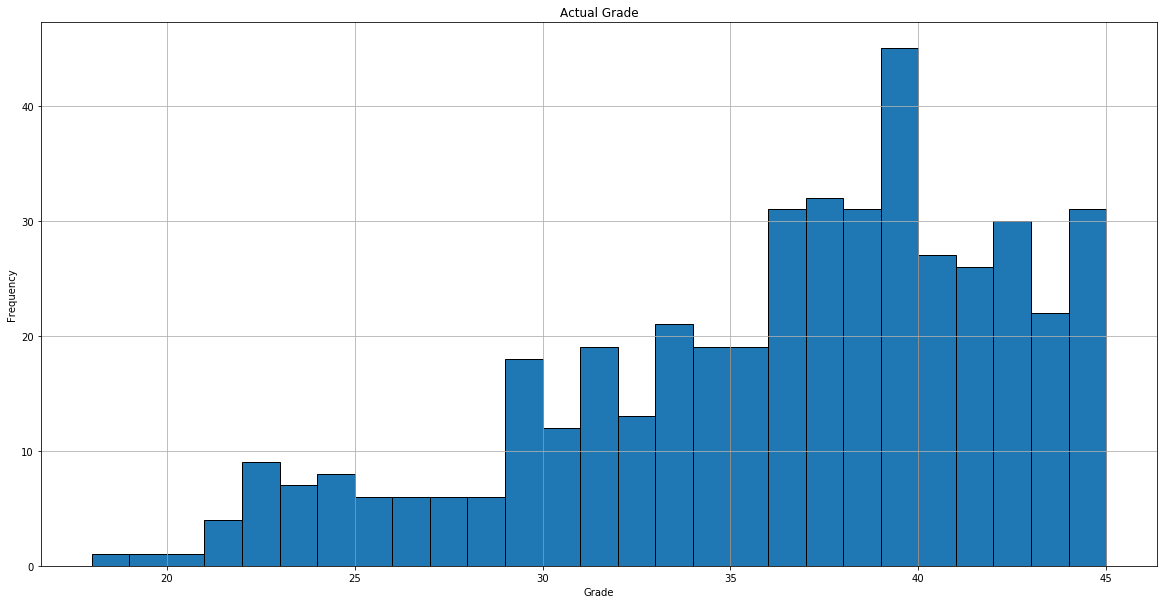

In [8]:
ax=data.hist(column='Actual Grade', figsize=(20,10), bins=data['Actual Grade'].max()-data['Actual Grade'].min(),edgecolor='000')
plt.ylabel('Frequency')
plt.xlabel('Grade')

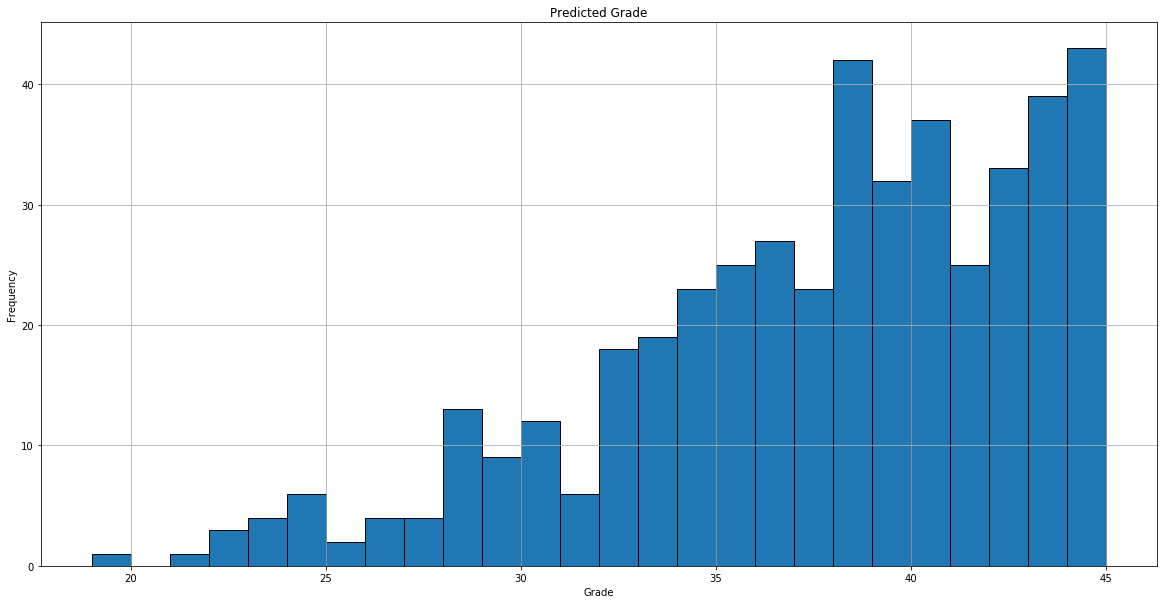

In [9]:
data.hist(column='Predicted Grade', figsize=(20,10),bins=int(data['Predicted Grade'].max()-data['Predicted Grade'].min()),edgecolor='000')
plt.ylabel('Frequency')
plt.xlabel('Grade')


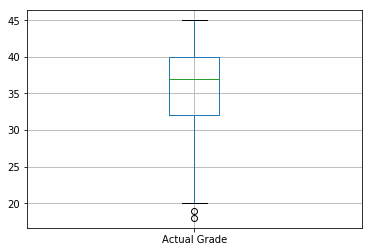

In [10]:
data.boxplot(column='Actual Grade', figsize=(10,30))

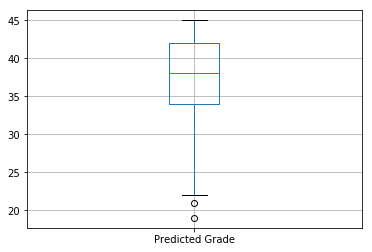

In [11]:
data.boxplot(column='Predicted Grade', figsize=(10,30))

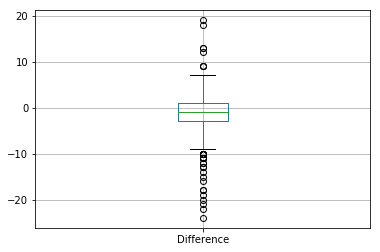

In [12]:
data.boxplot(column='Difference', figsize=(10,30))

Let's see how many predicted grade were correct.

In [13]:
correctly_predicted=(data['Difference']==0)
correctly_predicted.sum()
print ('Just ' + str(correctly_predicted.sum()) + ' out of ' + str(data['Actual Grade'].count()) +' were correctly predicted!')

Just 62 out of 451 were correctly predicted!


In [14]:
data['Timestamp']= pd.to_datetime(data['Timestamp'])
before_offical_release_date=data[(data['Timestamp']<'07-06-2017 14:00:00')]
before_offical_release_date.describe()

,Actual Grade,Predicted Grade,Difference
count,213.000,213.000,213.000
mean,35.178,37.488,-2.310
std,6.815,5.344,5.742
min,18.000,21.000,-24.000
25%,31.000,35.000,-5.000
50%,37.000,38.000,-2.000
75%,41.000,42.000,0.000
max,45.000,45.000,19.000


In [15]:
after_offical_release_date=data[(data['Timestamp']>'07-06-2017 14:00:00')]
after_offical_release_date.describe()


,Actual Grade,Predicted Grade,Difference
count,238.000,238.000,238.000
mean,36.513,36.987,-0.475
std,5.169,5.538,3.737
min,22.000,19.000,-22.000
25%,33.000,33.250,-2.000
50%,37.000,38.000,0.000
75%,40.000,41.000,2.000
max,45.000,45.000,13.000


In [16]:
data.sort_values('Difference', ascending=True)

,Timestamp,Actual Grade,Predicted Grade,Difference
38,2017-07-05 18:01:46,21,45.000,-24.000
406,2017-07-07 06:40:08,23,45.000,-22.000
73,2017-07-05 19:12:17,24,45.000,-21.000
33,2017-07-05 18:01:18,23,43.000,-20.000
21,2017-07-05 17:59:10,19,38.000,-19.000
17,2017-07-05 17:57:47,23,41.000,-18.000
14,2017-07-05 17:56:48,24,42.000,-18.000
31,2017-07-05 18:01:09,20,36.000,-16.000
118,2017-07-05 21:37:05,24,39.000,-15.000
23,2017-07-05 17:59:23,21,35.000,-14.000


In [17]:
data[:1].describe()

,Actual Grade,Predicted Grade,Difference
count,1.000,1.000,1.000
mean,37.000,40.000,-3.000
std,nan,nan,nan
min,37.000,40.000,-3.000
25%,37.000,40.000,-3.000
50%,37.000,40.000,-3.000
75%,37.000,40.000,-3.000
max,37.000,40.000,-3.000


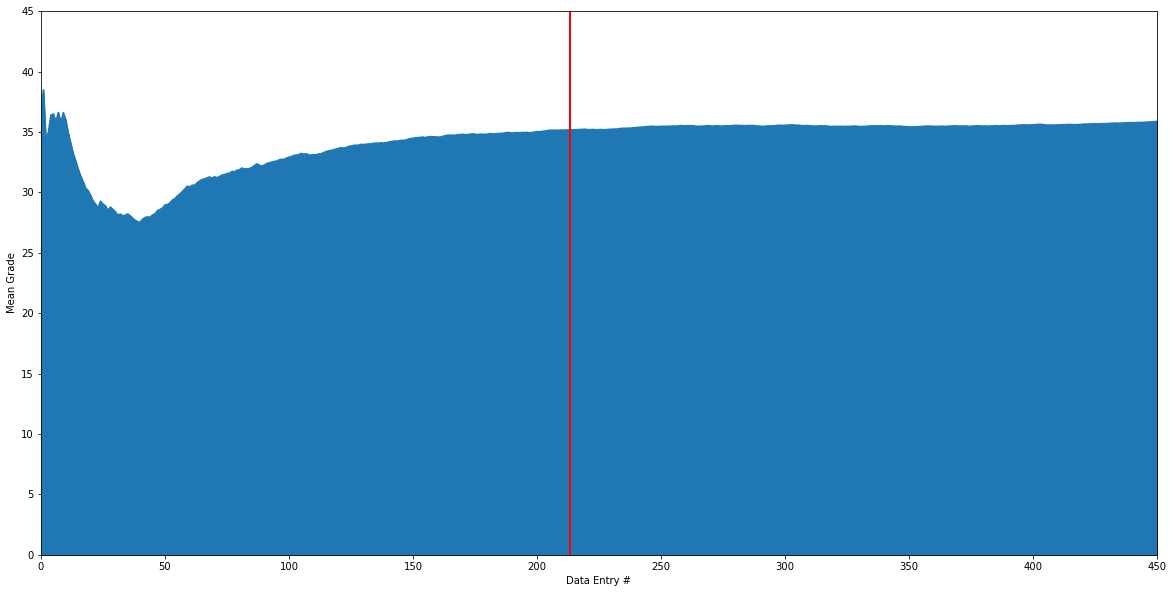

In [18]:
mot=[]
for x in range(0,data['Actual Grade'].count() ):
    mot.append((data['Actual Grade'][:x+1]).mean())

mean_over_time=pd.Series(mot)
mean_over_time.plot(kind='area',ylim=(0,45),y='Grades',figsize=(20,10))
plt.xlabel('Data Entry #')
plt.ylabel('Mean Grade')
# (mean_over_time.min(),mean_over_time.max()
plt.plot([213.5, 213.5], [0, 45], 'k-', lw=2,color='r')


In [19]:
ib_m16_results = pd.read_csv('./ib_m16_results.csv', sep=',')
ib_m16_results.head(46)
#note some are rounded if a frequency <10 or assumed to be 5 (like for Grade of 1) 


,Grade,Frequency
0,1,5
1,2,11
2,3,29
3,4,39
4,5,37
5,6,40
6,7,41
7,8,67
8,9,68
9,10,97


In [20]:
def descriptives_from_agg(values, freqs):
    values = np.array(values)
    freqs = np.array(freqs)
    count = freqs.sum()
    fx = values * freqs
    mean = fx.sum() / count
    variance = ((freqs * values**2).sum() / count) - mean**2
    variance = count / (count - 1) * variance  # dof correction for sample variance
    std = np.sqrt(variance)
    minimum = np.min(values)
    maximum = np.max(values)
    cumcount = np.cumsum(freqs)
    Q1 = values[np.searchsorted(cumcount, 0.25*count)]
    Q2 = values[np.searchsorted(cumcount, 0.50*count)]
    Q3 = values[np.searchsorted(cumcount, 0.75*count)]
    result = pd.Series([count, mean, std, minimum, Q1, Q2, Q3, maximum],
                       index=['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'])
    return result


descriptives_from_agg(ib_m16_results['Grade'], ib_m16_results['Frequency'])

count   74,496.000
mean        29.952
std          6.717
min          1.000
25%         26.000
50%         30.000
75%         35.000
max         45.000
dtype: float64

In [21]:
data.describe()

,Actual Grade,Predicted Grade,Difference
count,451.000,451.000,451.000
mean,35.882,37.224,-1.341
std,6.033,5.447,4.871
min,18.000,19.000,-24.000
25%,32.000,34.000,-3.000
50%,37.000,38.000,-1.000
75%,40.000,42.000,1.000
max,45.000,45.000,19.000


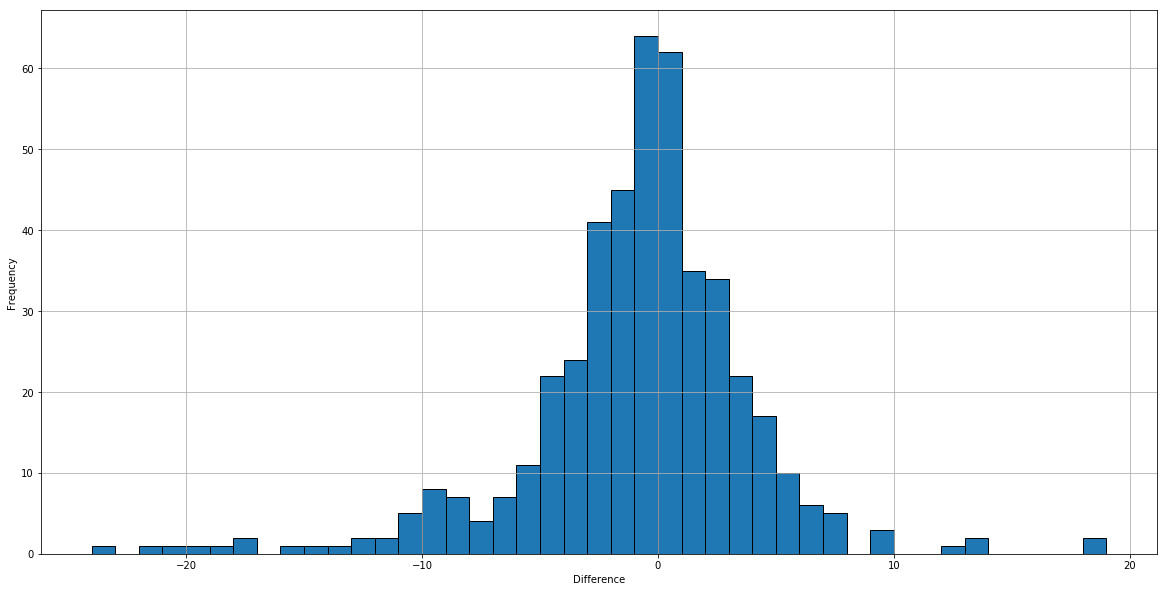

In [22]:
data['Difference'].hist(figsize=(20,10), bins=int(data['Difference'].max()-data['Difference'].min()),edgecolor='000')
plt.ylabel('Frequency')
plt.xlabel('Difference')

In [23]:
correctly_predicted=(data['Predicted Grade']==44)
correctly_predicted.sum()

17

In [24]:
correctly_predicted=(data['Difference']==1)
correctly_predicted.sum()

35